In [79]:
import numpy as np
import pandas as pd
from corm import model
from pysb.bng import generate_equations
%matplotlib inline
import seaborn as sns

/sw/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
generate_equations(model)

In [29]:
mcmc_results = pd.DataFrame(np.load('/Users/Erin/git/COX2/results/2015_02_02_COX2_all_traces.npy'))

In [32]:
mcmc_results.drop_duplicates().index

Int64Index([     0,     11,     19,     24,     25,     26,     28,     30,
                31,     34,
            ...
            349818, 349834, 349840, 349845, 349899, 349900, 349907, 349922,
            349947, 349980],
           dtype='int64', length=46666)

In [2]:
flux_results = np.load('/Users/Erin/git/COX2/results/CORM_flux_analysis.npy')

In [3]:
flux_results

array([[[   7.5       ,    1.85020568,    1.84500067, ...,    1.81390185,
            1.80662783,    1.7989901 ],
        [   7.5       ,    1.87668282,    1.89306294, ...,    1.97392946,
            1.98978493,    2.00549401],
        [ 112.5       ,   27.75308519,   27.67501004, ...,   27.20852781,
           27.09941746,   26.98485143],
        ..., 
        [   0.        ,   17.76782291,   17.5626915 , ...,   16.49566533,
           16.27434684,   16.05054386],
        [   0.        ,   16.22034393,   16.03350481, ...,   15.06139863,
           14.85972515,   14.65576767],
        [   0.        ,    1.20160619,    1.2014802 , ...,    1.19686293,
            1.1950821 ,    1.19299604]],

       [[   7.5       ,    1.92619736,    1.92039311, ...,    1.8865698 ,
            1.87881257,    1.87071503],
        [   7.5       ,    1.95120731,    1.96610505, ...,    2.0389523 ,
            2.05309011,    2.06704731],
        [ 112.5       ,   28.89296041,   28.80589658, ...,   28.29854698

In [13]:
model.reactions[0]

{'products': (5,),
 'rate': __s0*__s2*kf_AA_cat1,
 'reactants': (0, 2),
 'reverse': (False,),
 'rule': ('bind_COX2_AA_to_COX2AA',)}

In [20]:
rxn_strings = [str([model.species[ire] for ire in model.reactions[irxn]['reactants']])[1:-1] + ' --> ' + str([model.species[ip] for ip in model.reactions[irxn]['products']])[1:-1] for irxn in range(len(model.reactions))]

In [61]:
flux_df = pd.DataFrame(columns=pd.MultiIndex.from_product([rxn_strings, range(1,10)]), index=mcmc_results.drop_duplicates().index, dtype='float')

In [77]:
for irxn, rxn in enumerate(rxn_strings):
    for tpt in range(1, 10):
        flux_df.loc[:,(rxn, tpt)] = flux_results[:,irxn,tpt]

In [89]:
flux_df

Reactions  COX2(allo=None, cat=None), AA(b=None) --> AA(b=1) % COX2(allo=None, cat=1)  \
Time Point                                                                          1   
0                                                    1.850206                           
11                                                   1.926197                           
19                                                   1.815238                           
24                                                   1.797048                           
25                                                   1.815702                           
26                                                   1.814668                           
28                                                   1.816152                           
30                                                   1.848227                           
31                                                   1.864031                           
34                                                   2.014374                           
36                                                   2.020230                           
38                                                   1.919633                           
40                                                   1.956605                           
41                                                   1.891185                           
42                                                   1.885433                           
44                                                   1.872680                           
46                                                   1.814685                           
47                                                   1.815939                           
48                                                   1.680968                           
49                                                   1.751913                           
53                                                   1.761065                           
58                                                   1.762048                           
59                                                   1.779936                           
60                                                   1.807807                           
63                                                   1.814517                           
64                                                   1.831893                           
65                                                   1.857225                           
66                                                   1.908045                           
68                                                   1.927038                           
70                                                   1.924333                           
...                                                       ...                           
349393                                               1.987967                           
349484                                               1.998516                           
349510                                               1.867466                           
349528                                               1.891424                           
349535                                               1.895328                           
349536                                               1.985329                           
349542                                               2.058902                           
349554                                               2.049662                           
349572                                               1.901726                           
349578                                               1.758858                           
349596                                               1.762441                           
349615                                               1.935975                       

In [96]:
flux_df['Parameter Set'] = flux_df.index

In [101]:
melted_df = pd.melt(flux_df, id_vars=['Parameter Set'], value_vars=rxn_strings)

In [106]:
melted_df

,Parameter Set,Reactions,Time Point,value
0,0,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,1.850206
1,11,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,1.926197
2,19,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,1.815238
3,24,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,1.797048
4,25,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,1.815702
5,26,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,1.814668
6,28,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,1.816152
7,30,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,1.848227
8,31,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,1.864031
9,34,"COX2(allo=None, cat=None), AA(b=None) --> AA(b...",1,2.014374


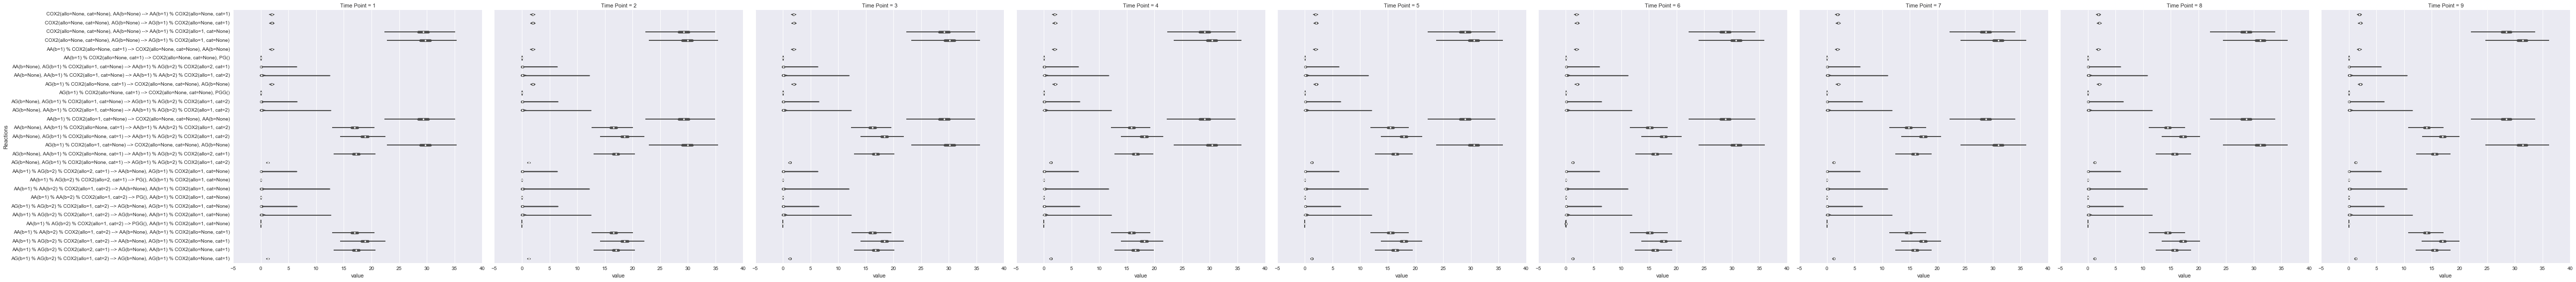

In [112]:
g = sns.FacetGrid(melted_df, col='Time Point', size=8)
g.map(sns.violinplot, 'value', 'Reactions', orient='h')

In [ ]:
flux_firstsec_results = np.load('/Users/Erin/git/COX2/results/CORM_flux_analysis_before1sec.npy')

In [ ]:
flux_firstsec_df = pd.DataFrame(columns=pd.MultiIndex.from_product([rxn_strings, range(1,10)]), index=mcmc_results.drop_duplicates().index, dtype='float')

In [ ]:
for irxn, rxn in enumerate(rxn_strings):
    for tpt in range(1, 10):
        flux_first_sec_df.loc[:,(rxn, tpt)] = flux_first_sec_results[:,irxn,tpt]

In [ ]:
flux_firstsec_df['Parameter Set'] = flux_firstsec_df.index
flux_firstsec_df.names = ['Reactions', 'Time Point']

In [ ]:
melted_df_firstsec = pd.melt(flux_firstsec_df, id_vars=['Parameter Set'], value_vars=rxn_strings)

In [ ]:
g = sns.FacetGrid(melted_df_firstsec, col='Time Point', size=8)
g.map(sns.violinplot, 'value', 'Reactions', orient='h')